In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
sns.set()
sns.set_palette("colorblind")

In [4]:
logdir = Path('/run/user/1000/gvfs/sftp:host=cluster.isir.upmc.fr,user=ecoffet/home/ecoffet/robocoop/logs/2018-03-19-1827-bigmodel-b1/')
list(logdir.glob('*/*'))

[PosixPath('/run/user/1000/gvfs/sftp:host=cluster.isir.upmc.fr,user=ecoffet/home/ecoffet/robocoop/logs/2018-03-19-1827-bigmodel-b1/bigmodel_mlp_nolim/run_2'),
 PosixPath('/run/user/1000/gvfs/sftp:host=cluster.isir.upmc.fr,user=ecoffet/home/ecoffet/robocoop/logs/2018-03-19-1827-bigmodel-b1/bigmodel_mlp_nolim/run_5'),
 PosixPath('/run/user/1000/gvfs/sftp:host=cluster.isir.upmc.fr,user=ecoffet/home/ecoffet/robocoop/logs/2018-03-19-1827-bigmodel-b1/bigmodel_mlp_nolim/run_4'),
 PosixPath('/run/user/1000/gvfs/sftp:host=cluster.isir.upmc.fr,user=ecoffet/home/ecoffet/robocoop/logs/2018-03-19-1827-bigmodel-b1/bigmodel_mlp_nolim/run_3'),
 PosixPath('/run/user/1000/gvfs/sftp:host=cluster.isir.upmc.fr,user=ecoffet/home/ecoffet/robocoop/logs/2018-03-19-1827-bigmodel-b1/bigmodel_mlp_nolim/run_1')]

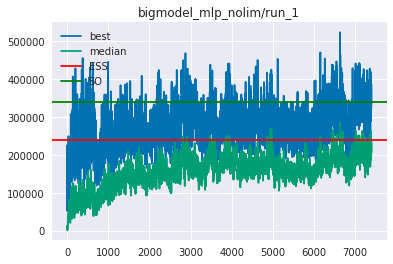

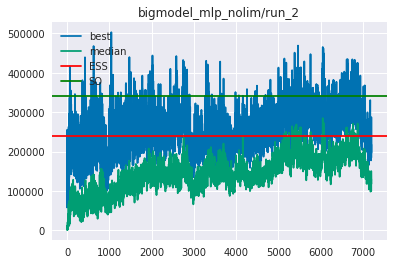

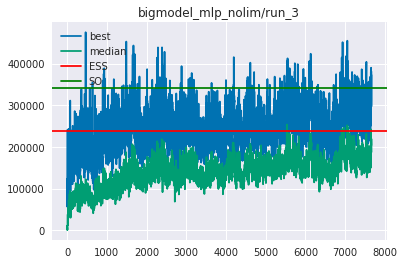

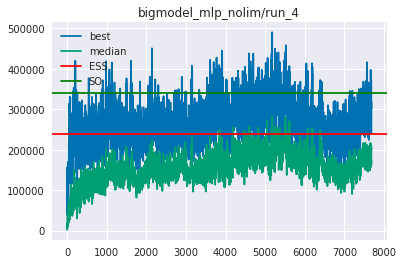

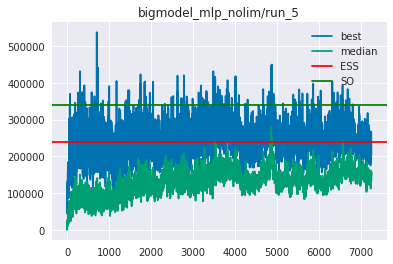

In [17]:
def p(x, x0, a, b, n=2):
    return (a * (x + (n-1) * x0) + b * (n - 1) * x0) / n - 1/2 * x**2

rsize = 1


cond = 'big' # bigmodel_ab_new


for path in sorted(list(logdir.glob('{}*/*/'.format(cond)))):
    plt.figure()
    dat = np.loadtxt(path / 'fit.dat', comments=["%", "#"])
    df = pd.DataFrame(data=dat, columns="iteration,evaluation,sigma,axisratio,bestever,best,median,worst".split(","))
    df[['best', 'median', 'worst']] = -df[['best', 'median', 'worst']]
    df[['best', 'median']].plot()
    if cond.startswith('big'):
        nbrep = 6
        nbeval = 1
        a = 5
        b = 1
        n = 2
        xess = a/n
        xso = a + (n - 1)/n * b
        plt.axhline(5000*p(xess, xess, a, b)*0.75*nbrep*nbeval, color="r", label="ESS")
        plt.axhline(5000*p(xso, xso, a, b)*0.75*nbrep*nbeval, color="g", label="SO")
    if cond.startswith('correp'):
        plt.axhline(2500*1*0.90, color="g", label="2")
        plt.axhline(2500*0.5*0.90, color="r", label="1 ou 3")
    plt.title("{}/{}".format(path.parent.name, path.name))
    plt.legend()
    plt.show();